In [6]:
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import numpy as npy
#import random
import plotly.graph_objects as go
from matplotlib.widgets import Slider, Button

In [7]:
# timestep determines the accuracy of the euler method of integration
timestep = 0.0001
# amplitude of noise term
amp = 0.00
# the time at which the simulation ends
end_time = 50

# creates a time vector from 0 to end_time, seperated by a timestep
t = npy.arange(0,end_time,timestep)

# intialize rabbits (x) and foxes (y) vectors
x = []
y = []

# initial conditions for the rabbit (x) and fox (y) populations at time=0
x.append(100)
y.append(20)

In [8]:
# birth rate of rabbits
a = 1
# death rate of rabbits due to predation
b = 0.1
# natural death rate of foxes
c = 0.5
# factor that describes how many eaten rabbits give birth to a new fox
d = 0.02

In [9]:
for index in range(1,len(t)):
    
    # make parameters stochastic
#     a = a + StochasticTerm(amp)
#     b = b + StochasticTerm(amp)
#     c = c + StochasticTerm(amp)
#     d = d + StochasticTerm(amp)
    
    # evaluate the current differentials
    xd = x[index-1] * (a - b*y[index-1])
    yd = -y[index-1]*(c - d*x[index-1])
    
    # evaluate the next value of x and y using differentials
    next_x = x[index-1] + xd * timestep
    next_y = y[index-1] + yd * timestep

    # add the next value of x and y 
    x.append(next_x)
    y.append(next_y)

<Figure size 640x480 with 0 Axes>

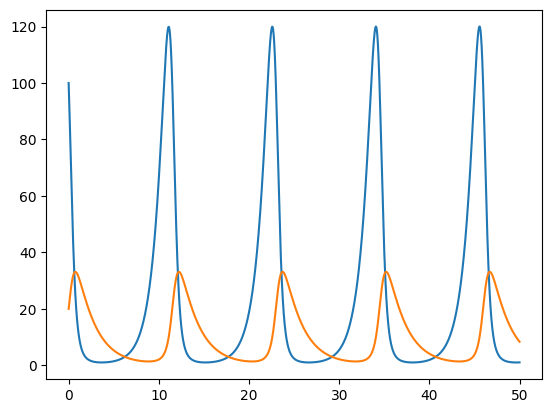

In [30]:
# Create the figure and the line that we will manipulate
fig = plt.figure()
ax = plt.subplots()
line_mooses = plt.plot(t, x)
line_wolfes = plt.plot(t, y)

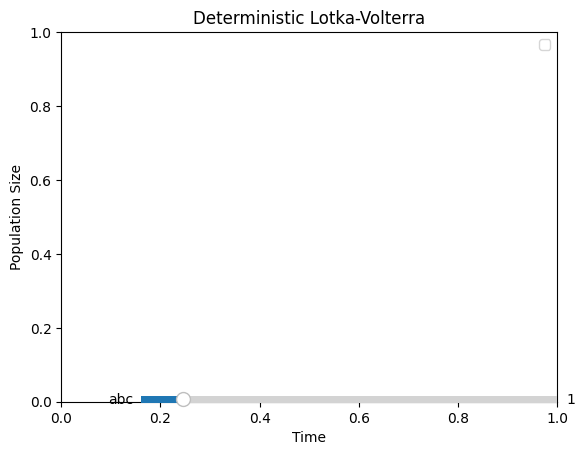

In [29]:
# visualization of deterministic populations against time
line_mooses
line_wolfes
plt.xlabel('Time')
plt.ylabel('Population Size')
plt.legend(('Mooses', 'Wolfes'))
plt.title('Deterministic Lotka-Volterra')

ax_a = plt.axes([0.25, 0.1, 0.65, 0.03], facecolor='red')
slider_a = Slider(
    ax = ax_a,
    label = 'abc',
    valmin=0,
    valmax=10,
    valinit=a
    )

def update(val):
    line.set_ydata(f(t, amp_slider.val, freq_slider.val))
    fig.canvas.draw_idle()

plt.show()